**Exercise 3 - Logistic regression**

---

This exercise will be about logistic regression. Given a set of data points and classes your task will be to implement the functions that calculate the model $\theta$ parameters to fit the data and infer the class for each point set.

In [1]:
# import libraries used during this exercise
# it may be necessary to uncomment the two following pip commands
# !pip3 install pandas
# !pip3 install matplotlib
import pandas as pd
import numpy as np
from mlrcv.core import *
%matplotlib notebook
%matplotlib inline

C:\Users\prasa\AppData\Local\Temp\ipykernel_23744\4140977981.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In this exercise we will use a toy dataset with $x_1$, $x_2$ and the $y$ (*class*) values, where the point ($x_1$,$x_2$) is the observed data that should be used to predict the $y$ class value.

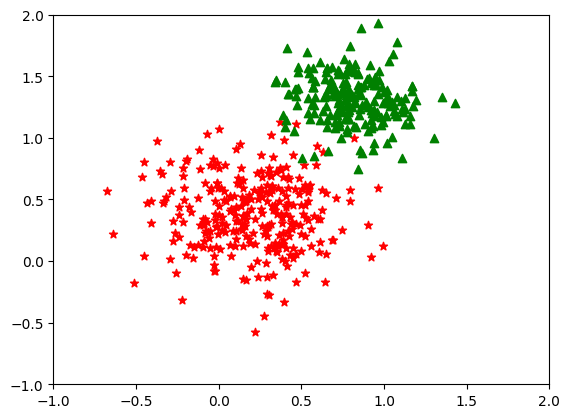

In [2]:
# Dataset read
df = pd.read_csv('data/logistic_regression.csv')
x_bin = df.drop(columns=['class']).values
y_bin = df['class'].values
y_bin = y_bin[:, None]

plot_data_binary(x_bin, y_bin)

**3.1 Logistic regression \[5\]**

---

Given the loaded dataset $x=(x_1,x_2)$ and $y$, you should implement the functions in the *mlrcv/logistic_regression.py* and *mlrcv/utils.py* files to calculate the model $\theta$ parameters vector that will fit the data. The following functions should be implemented in *utils.py* file:
- *sigmoid*: the activation function used during training

Then, you should implement the functions from the class *LogisticRegression*::
- *train_model*: train the model
- *first_derivative*: compute the gradients (derivatives) to update the $\theta$ parameters
- *predict_y*
- *eval*

(**Note:** The *plot_regression_binary* function is already implemented on the *core.py* file.)

In [3]:
from mlrcv.logistic_regression import *
from mlrcv.utils import *

x_bin_train, y_bin_train, x_bin_val, y_bin_val = split_data(x_bin, y_bin)

Model accuracy: 61.20


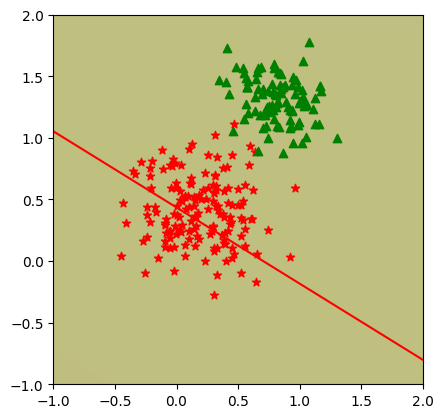

In [4]:
model = LogisticRegression(learning_rate=.001, epochs=25)
model.train_model(x_bin_train, y_bin_train)

print('Model accuracy: %.2f' % model.eval(x_bin_val, y_bin_val))
plot_regression_binary(x_bin_val, y_bin_val, model)

Probably, with the pre-defined parameters *learning_rate=0.000001* and *epochs=1* you will not achieve the best performance (something around 70%-80% of accuracy only), and you may notice that the regression decision gradients (background color) and the regression lines will not be correctly fitted, with the same color all over the background. This represents a bad fitting by the model, since it cannot distinguish which region represents which class.

Since this dataset is quite "easy", you should be able to get around 96% of accuracy by changing the *learning_rate* and *epochs* parameters. Play around with those two parameters and check the accuracy and the plots behavior, have fun!

Based on your tests with the model parameters, with which *learning_rate* and *epochs* values your model achieves a good performance (well defined background gradients and regression line)?

- *Answer here*


**3.2 Multi-class logistic regression (Softmax regression) \[5\]**

---

In some cases our data may have more than two classes, for that we can represent the logistic regression as a multi-class formulation. In this second task you should implement the class *MultiClassLogisticRegression* to fit your model in this dataset with 3 classes.

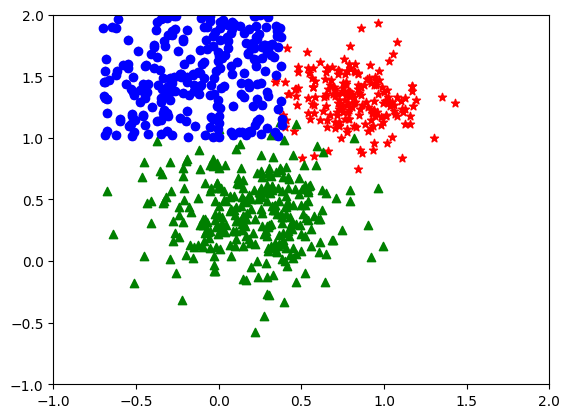

In [5]:
# Dataset read
df = pd.read_csv('data/logistic_regression_multi_class.csv')
x_multi = df.drop(columns=['class']).values
y_multi = pd.get_dummies(df['class']).values

num_class = 3

plot_data_multi_class(x_multi, y_multi)

# implemented, already split our data here
x_multi_train, y_multi_train, x_multi_val, y_multi_val = split_data(x_multi, y_multi)

As in the previous tasks, you should implement the four functions inside the *MultiClassLogisticRegression* class, but now for the multi-class case:
- *train_model*: train the model
- *first_derivative*: compute the gradients (derivatives) to update the $\theta$ parameters
- *predict_y*
- *eval*

And in this case, implement the *softmax* function as well. (**Note:** The *plot_regression_multi_class* function is already implemented.)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


learning rate  0.9 epochs  100
Accuracy: 96.0
Model acc:  96.0


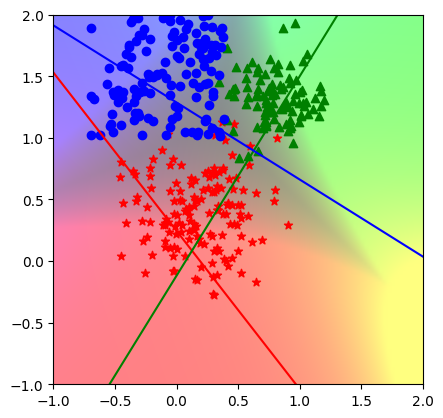

In [14]:
from mlrcv.logistic_regression import *
from mlrcv.utils import *

model = MultiClassLogisticRegression(learning_rate=.9, epochs=100)
model.train_model(x_multi_train, y_multi_train)
print("learning rate ", model.learning_rate, "epochs ", model.epochs)
print('Model acc: ', model.eval(x_multi_val, y_multi_val))

plot_regression_multi_class(x_multi_val, y_multi_val, model)

As in the logistic regression case, with the pre-defined parameters *learning_rate=0.000001* and *epochs=1* your model should have a poor performance. In that case the background plot will be gray, since the model cannot properly define the boundary regions. Again, in this task you should change them to achieve around 96% accuracy with your model, and see a well defined decision regions for each class. Play again with the parameters and check the changes on the accuracy and plots.

Based on your tests with the model parameters, with which *learning_rate* and *epochs* values you model achieves a good performance (well defined background gradients and regression lines)?

- *Answer here*

**Assignment Submission**

---

You should zip and submit the ```ex3_logistic_regression.ipynb``` file together with all the ```.py``` files inside the ```mlrcv/``` directory.

You can automatically generate the submission file using the provided ```zip_submission.sh``` script by running:

```
bash zip_submission.sh
```

This will zip the necessary files for your submission and generate the ```ex3_mlrcv_submission.zip``` file to be submit via ecampus.